# Inferences

I'm going to keep track of model progress in this notebook. After X number of steps, I will extract inferences and view the predictions. 

In [1]:
import pandas as pd
import numpy as np
import cv2
from PIL import Image
import os
import glob
from io import BytesIO
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from utils.local_utils import prepare_df, plot_examples

In [2]:
tf.__version__

'2.2.0'

# 10000 steps of training

In [3]:
INPUT_PATH = "./global-wheat-detection/inferences.tfrecord"

In [4]:
inferences = prepare_df(INPUT_PATH, 1024, 1024)

In [5]:
all_files = list(inferences.filename.unique())

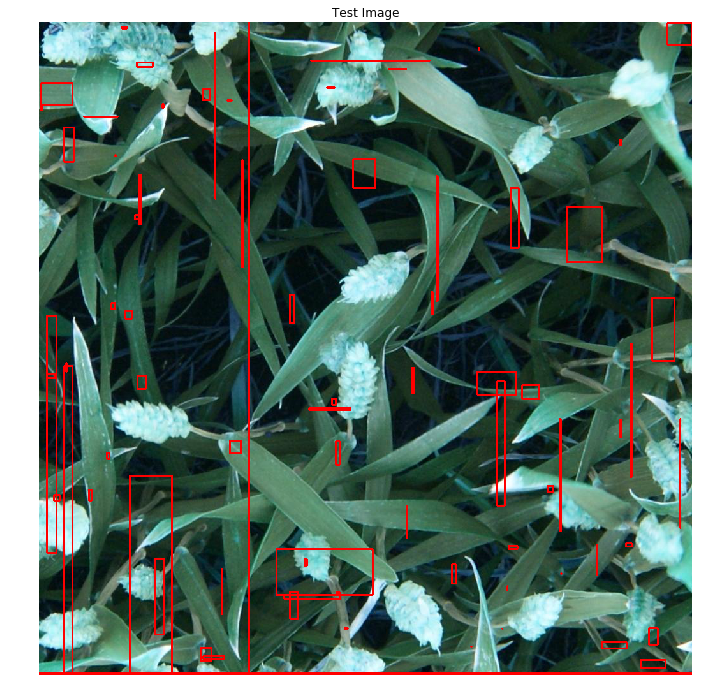

In [6]:
input_dir = "./global-wheat-detection/test"

plot_examples(inferences, all_files[0], input_dir)

These are terrible. Obviously we need more training.

# 60000 Steps

In [7]:
INPUT_PATH = "./global-wheat-detection/inferences60000.tfrecord"

In [8]:
inferences = prepare_df(INPUT_PATH, 1024, 1024)

In [9]:
all_files = list(inferences.filename.unique())

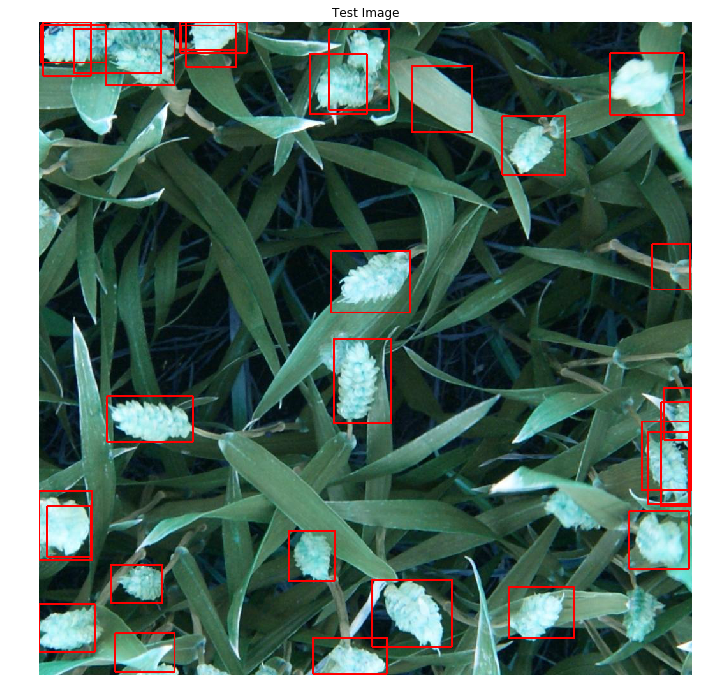

In [10]:
input_dir = "./global-wheat-detection/test"

plot_examples(inferences, all_files[0], input_dir)

Better, but we have some overlapping boundary boxes and clearly more non-max suppression is in order.

# 120,000 Steps

In [11]:
INPUT_PATH = "./global-wheat-detection/inferences120000.tfrecord"

In [12]:
inferences = prepare_df(INPUT_PATH, 1024, 1024)

In [13]:
all_files = list(inferences.filename.unique())

print(len(all_files))

9


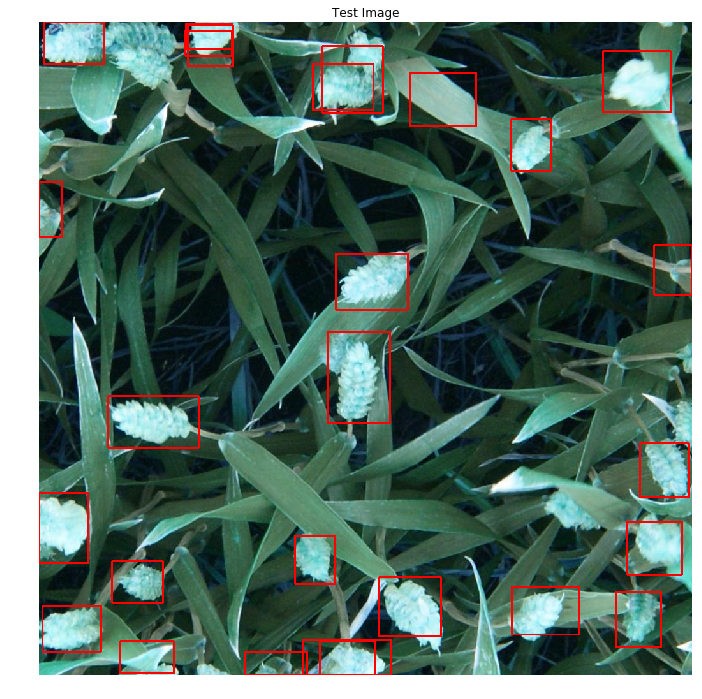

In [14]:
plot_examples(inferences, all_files[0], input_dir)

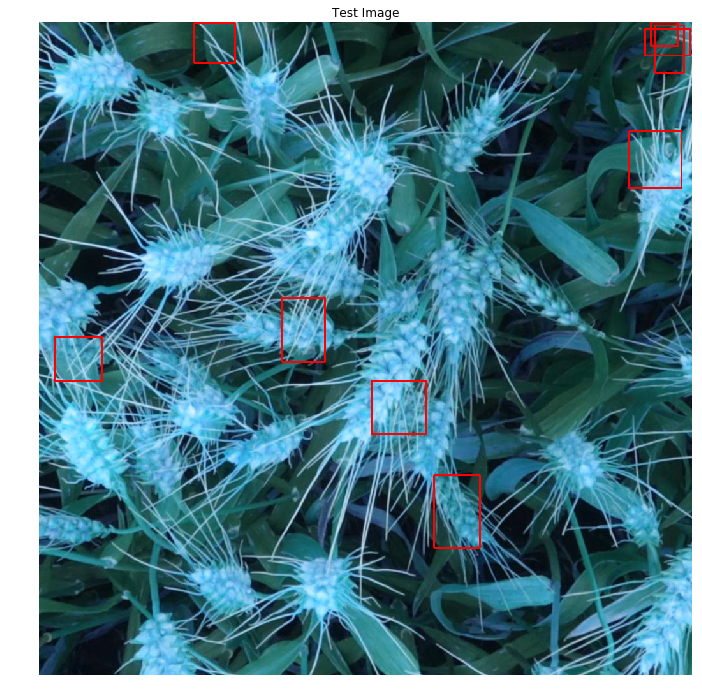

In [15]:
plot_examples(inferences, all_files[1], input_dir)

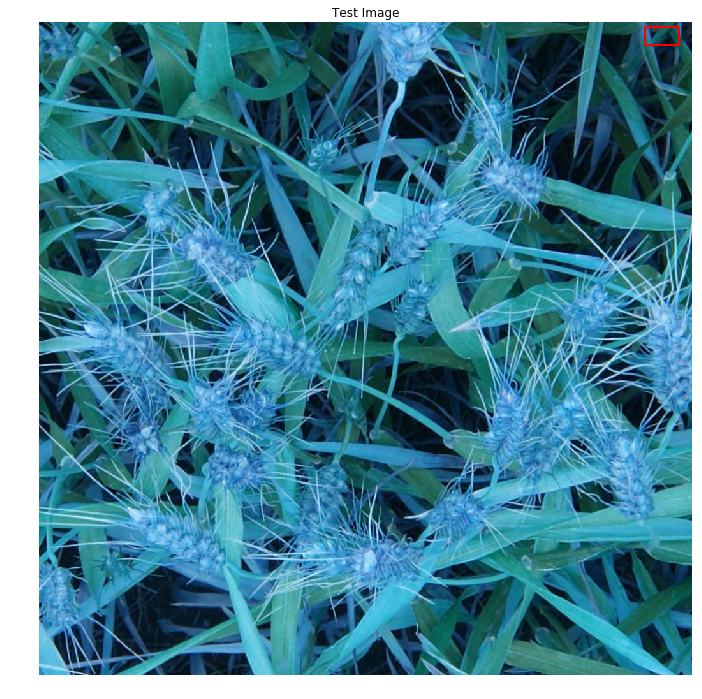

In [16]:
plot_examples(inferences, all_files[2], input_dir)

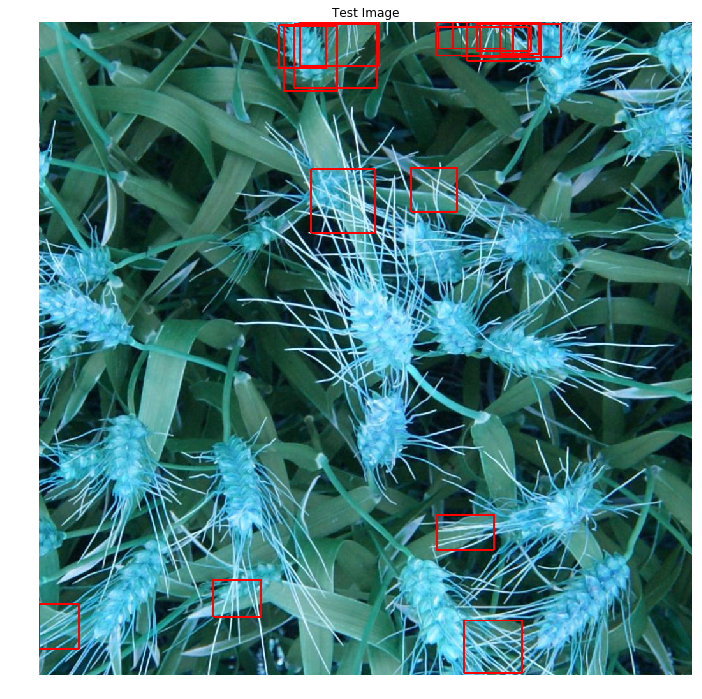

In [17]:
plot_examples(inferences, all_files[3], input_dir)

Still struggling to pick up a majority of the wheat-heads. There is really only one image in which the object detection is working well, and the rest of the test images are struggling. I am not sure how much more value can be found in more training steps, it may be time to consider a new modeling technique.